```
Student-1
Name: Tanvir Anzoom
ID# 20-41920-1
```

```
Student-2
Name: MD.ASGOR HOSSAIN REAJ
ID# 20-42009-1
```



*   Mount your google drive.



In [4]:
# mount google drive if you are using Colab
# otherewise, leave it blank

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [2]:
# load/import all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [80]:
# write task-1 solution

np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/python_final_project_group_05/home_loan_approval.csv')
df = shuffle(df)
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
583  LP002898    Male     Yes          1      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
443  LP002422    Male      No          1      Graduate            No   
442  LP002418    Male      No         3+  Not Graduate            No   
267  LP001882    Male     Yes         3+      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
98   LP001334    Male     Yes          0  Not Graduate            No   
322  LP002054    Male     Yes          2  Not Graduate            No   
382  LP002231  Female      No          0      Graduate            No   
365  LP002181    Male      No          0  Not Graduate            No   
510  LP002637    Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
583             1880                0.0        61.0           

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [81]:
# write task-2 solution

x=df['Gender'].mode()[0]
df['Gender'].fillna(x,inplace=True)

x=df['Married'].mode()[0]
df['Married'].fillna(x,inplace=True)

x=df['Dependents'].mode()[0]
df['Dependents'].fillna(x,inplace=True)

x=df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(x,inplace=True)

x=df['LoanAmount'].mean()
df['LoanAmount'].fillna(x,inplace=True)

x=df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'].fillna(x,inplace=True)

x=df['Credit_History'].mode()[0]
df['Credit_History'].fillna(x,inplace=True)

duplicate = df.duplicated().any()
print("Duplicate Rows: \n", duplicate)

bins = [0, 30000, 60000, 90000, float('inf')]
labels = ['0-30k', '30k-60k', '60k-90k','90k+']



Duplicate Rows: 
 False


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

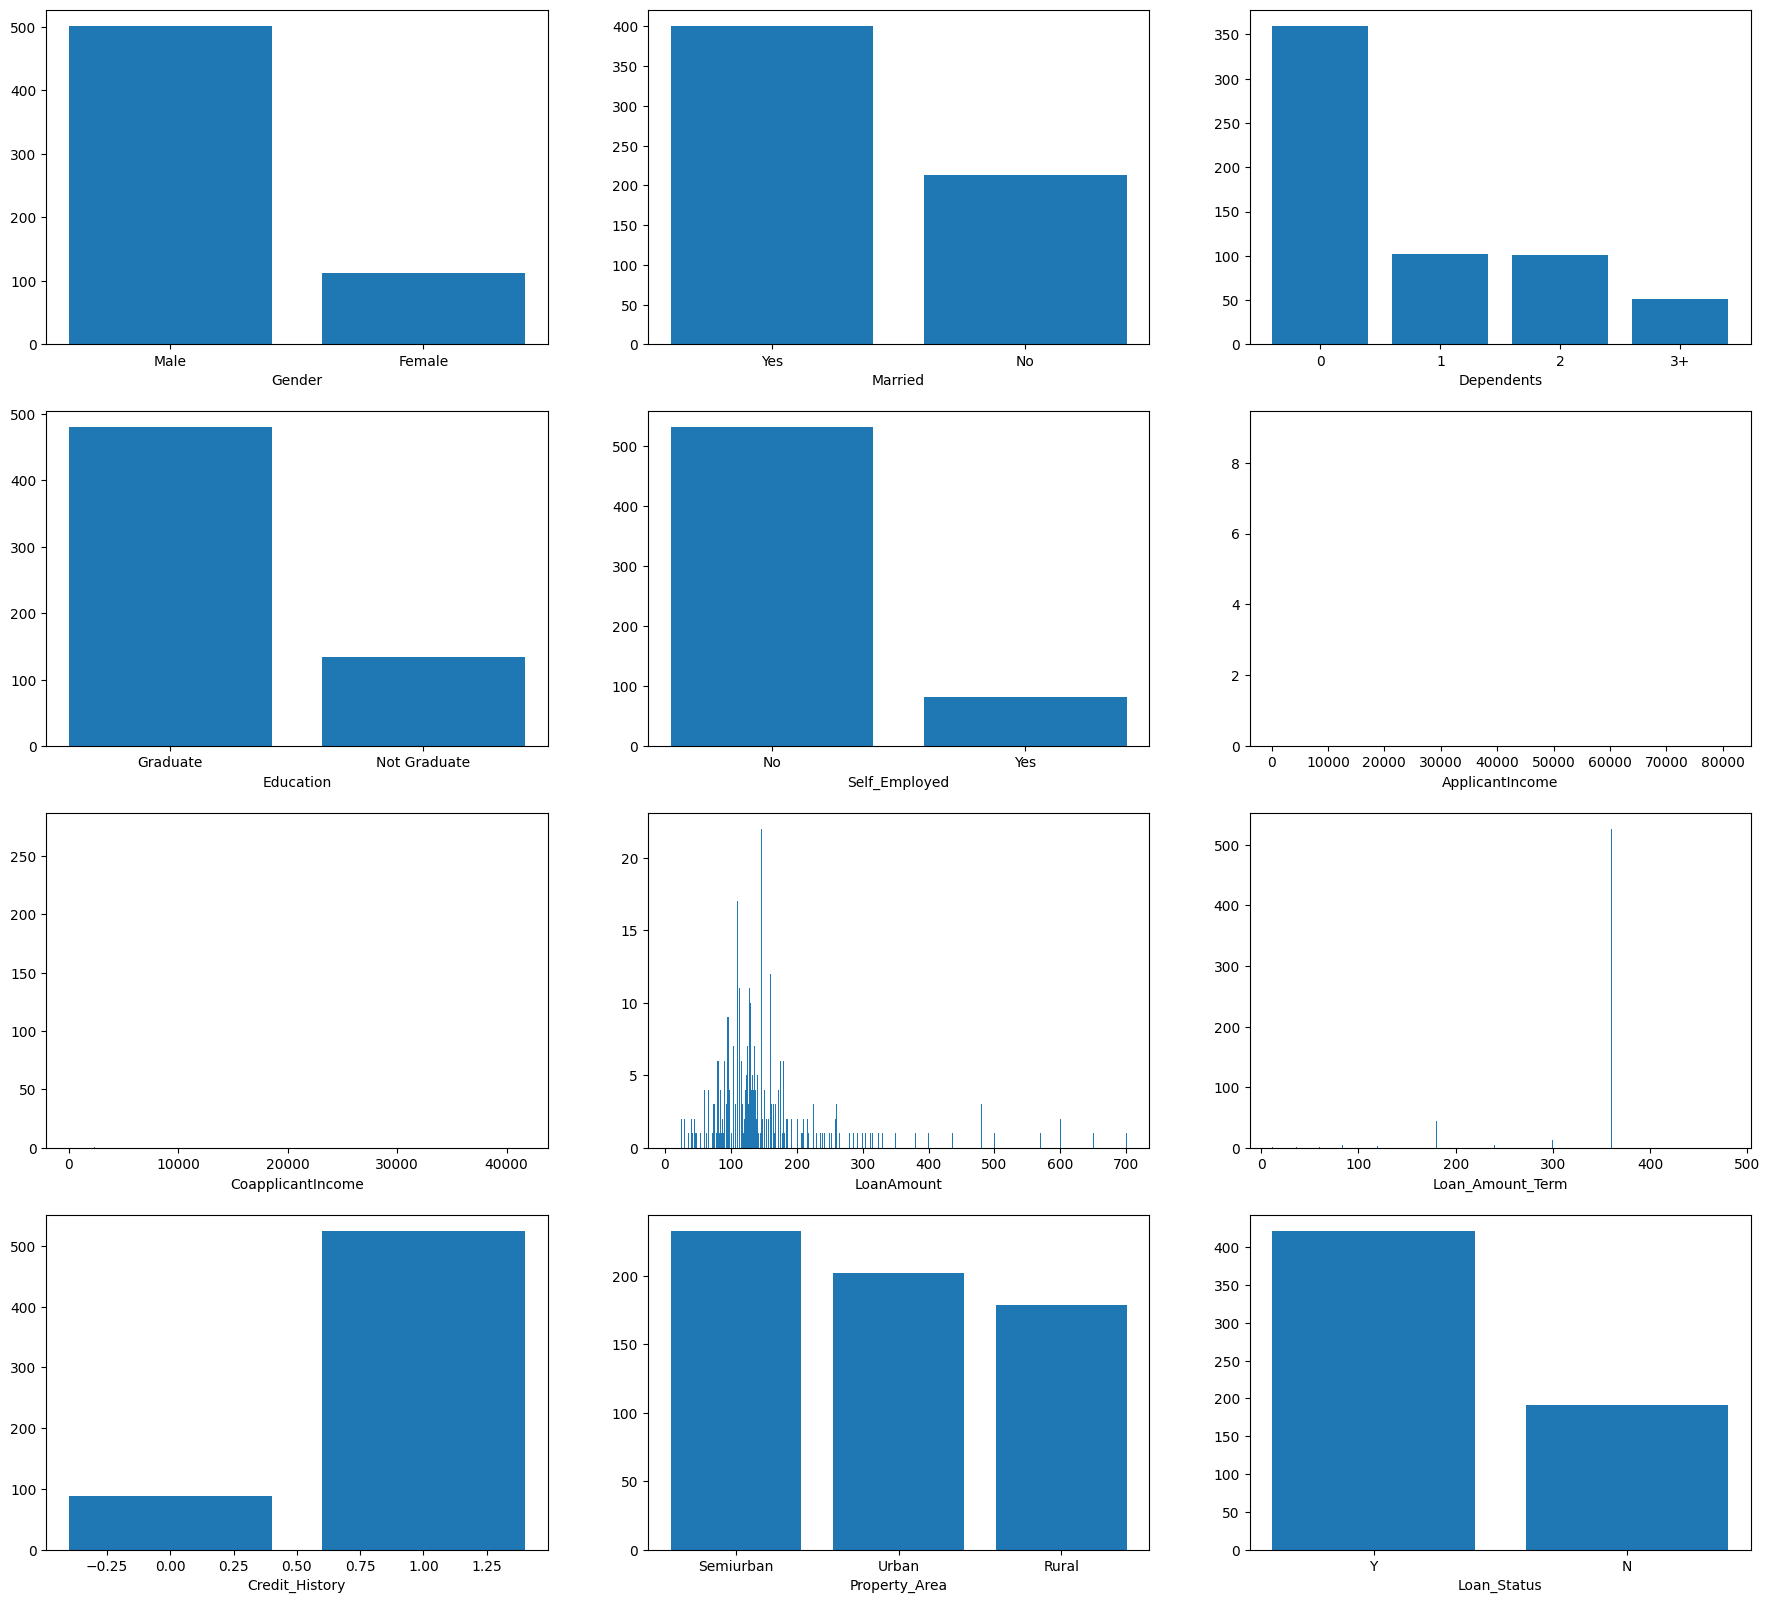

In [82]:
# write task-3 solution

plt.figure(figsize=(22, 20))

i = 1
for column in df.columns[1:]:
  frequency = df[column].value_counts()

  plt.subplot(4, 3, i)
  plt.bar(frequency.index, frequency.values)
  plt.xlabel(column)
  i = i+1

plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

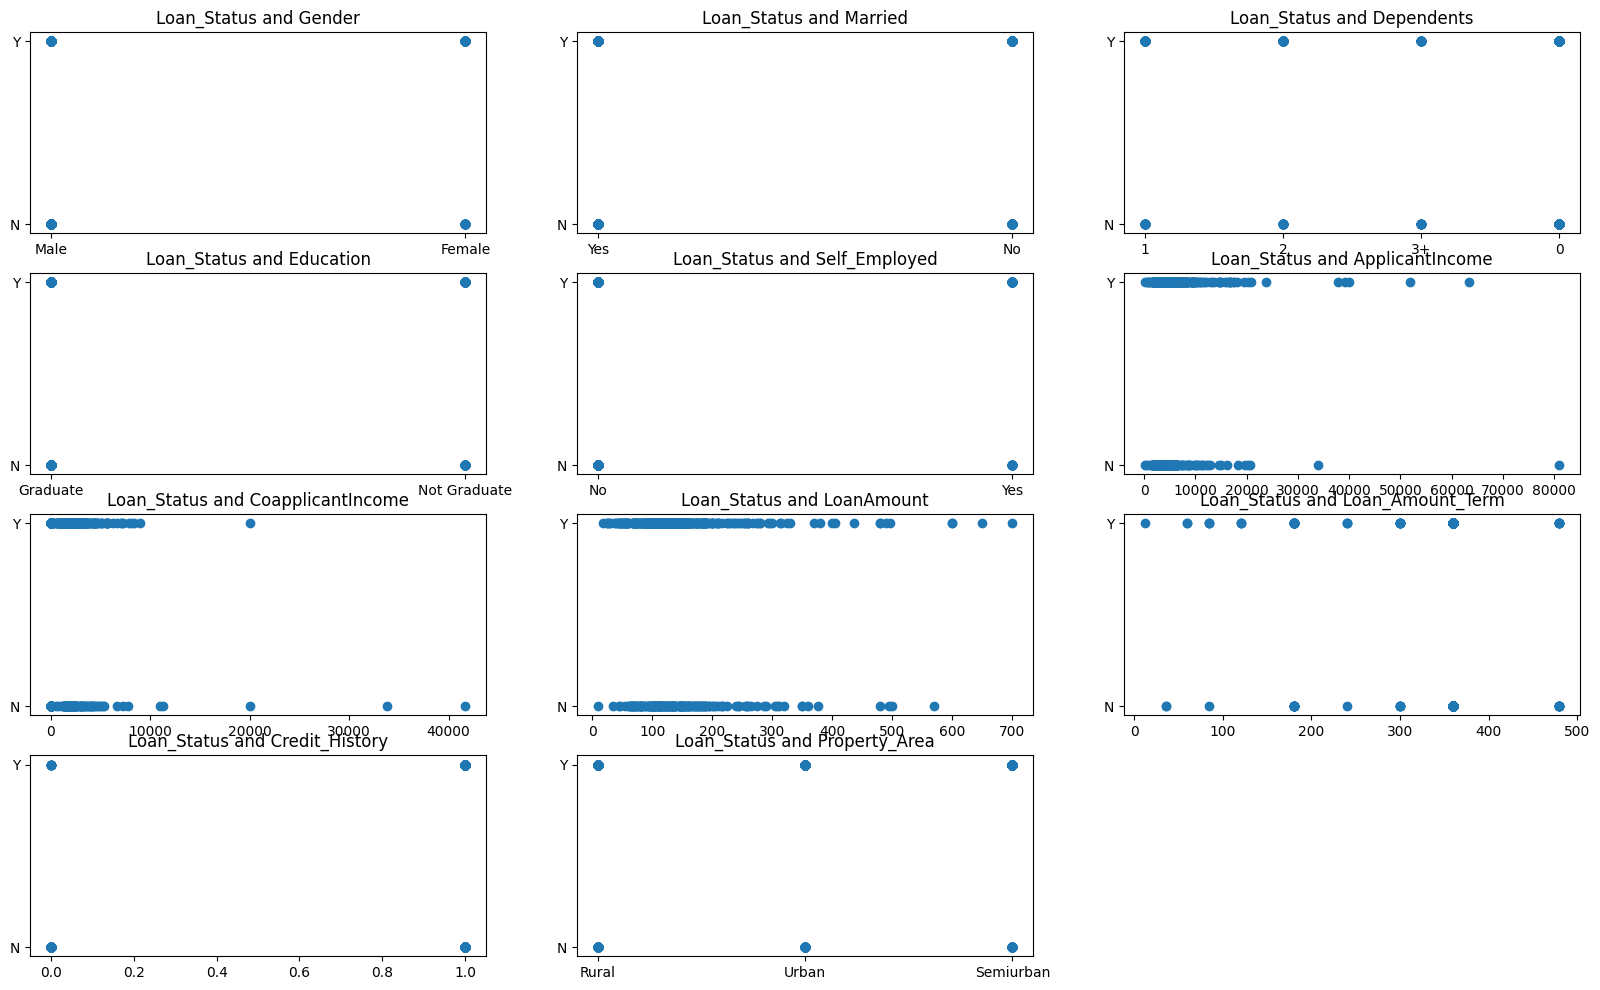

In [85]:
# write task-4 solution


plt.figure(figsize=(20, 12))
target_column = 'Loan_Status'

i = 1
for column in df.columns[1:12]:
  plt.subplot(4, 3, i)
  plt.scatter(df[column], df[target_column])
  plt.title(f'Loan_Status and {column}')
  i = i+1

plt.show()



•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [89]:
# write task-5 solution

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])


features = df.columns[1:12]

X = df[features]
y = df['Loan_Status']

scaler = StandardScaler()
X[features] = scaler.fit_transform(X)
print(X)



       Gender   Married  Dependents  Education  Self_Employed  \
583  0.472343  0.728816    0.253470  -0.528362      -0.392601   
11   0.472343  0.728816    1.244745  -0.528362      -0.392601   
443  0.472343 -1.372089    0.253470  -0.528362      -0.392601   
442  0.472343 -1.372089    2.236021   1.892641      -0.392601   
267  0.472343  0.728816    2.236021  -0.528362      -0.392601   
..        ...       ...         ...        ...            ...   
98   0.472343  0.728816   -0.737806   1.892641      -0.392601   
322  0.472343  0.728816    1.244745   1.892641      -0.392601   
382 -2.117107 -1.372089   -0.737806  -0.528362      -0.392601   
365  0.472343 -1.372089   -0.737806   1.892641      -0.392601   
510  0.472343 -1.372089   -0.737806   1.892641      -0.392601   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
583        -0.577232          -0.554487   -1.017187          0.273231   
11         -0.475660           0.074817   -0.445547          0.273231   


<ipython-input-89-4d742e9b6172>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = scaler.fit_transform(X)


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [91]:
# write task-6 solution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Training:", X_train.shape, y_train.shape)
print("Testing:", X_test.shape, y_test.shape)

Training: (491, 11) (491,)
Testing: (123, 11) (123,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [92]:
# write task-7 solution

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_prediction = nb_model.predict(X_test)


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

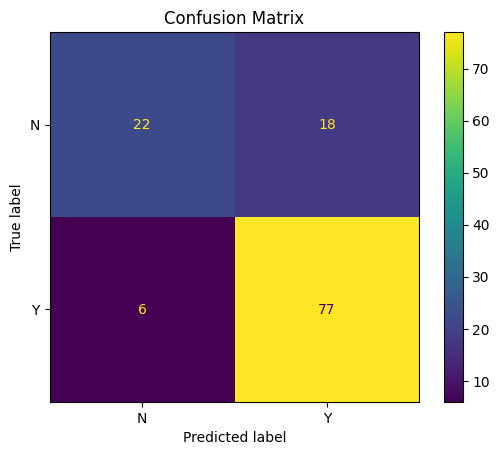

In [93]:
# write task-8 solution

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = nb_model.classes_)

cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [100]:
# write task-9 solution

pos_label = 'Y'

accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_prediction, pos_label=pos_label)
print("Precision:", precision)

recall = recall_score(y_test, y_prediction, pos_label=pos_label)
print("Recall:", recall)

f1_score = f1_score(y_test, y_prediction, pos_label=pos_label)
print("F1 Score:", f1_score)

Accuracy: 0.8048780487804879
Precision: 0.8105263157894737
Recall: 0.927710843373494
F1 Score: 0.8651685393258428


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [102]:
# write task-10 solution

num_folds = 10

accuracy_scores = cross_val_score(nb_model, X, y, cv=num_folds, scoring='accuracy')

mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy across {num_folds}-fold cross-validation: {mean_accuracy:.4f}')

Mean Accuracy across 10-fold cross-validation: 0.7931
